In [8]:
import numpy as np
import matplotlib.pyplot as plt

from ising_animator import IsingAnimator
from abstract_ising import AbstractIsing

%matplotlib inline

## 1D Random Bond Ising on a Periodic Chain

$$H = J \sum_{\langle ij \rangle} B_{ij} \sigma_i \sigma_j$$

where $B_{ij} = \pm 1$ which is selected randomly and independently for each bond nearest neighbour bond $ij$ when the model is initialized.

In [21]:
class RandomBondIsing1DPBC(AbstractIsing):
    def __init__(self, N, J=1.):
        self.J, self.N = J, N
        self.num_spins = self.N
        
        self.bonds = 2*(np.random.rand(self.N) < 0.5) - 1
        
        # initialize system at infinite temperature
        # i.e. spins are completely random and uncorrelated
        self.spins = 2*(np.random.rand(self.N) < 0.5) - 1
    
    def energy(self, spins=None):
        """Returns the energy of the current spin configuration"""
        spins = self.spins if spins is None else spins
        interactions = self.bonds * spins * np.roll(spins, 1, axis=-1)
        total = self.J * np.sum(interactions, axis=-1)
        return total

    def energy_diff(self, i):
        """Returns the energy difference resulting from flipping the i'th site"""
        # sum the nearest neighbour sites
        
        nn_sum = (
            self.bonds[i] * self.spins[i-1] 
            + self.bonds[(i+1)%self.N] * self.spins[(i+1) % self.N] 
        )

        return -2 * self.J * self.spins[i] * nn_sum
    
    def rand_site(self):
        """Selects a site in the lattice at random"""
        return (np.random.randint(self.N),)

=== Exact Energy Calculation for 10 ===
-8

=== Annealing Energy Calculation for 10 ===
4
-4
-4
4
0
-8
0
-4
0
0
-4
0
-8
-8
-8
-8
-8
-8
-8
-8


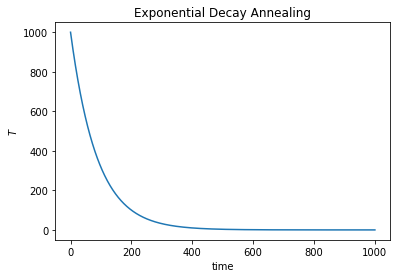

In [93]:
def annealing_schedule(steps, start_temp, final_temp):
    N = steps
    T_i = start_temp
    T_f = final_temp
    for t in range(N):
        # Annealing
        T = T_i * ((T_f/T_i) ** (t/N))
        E = ising.mc_step(T=T)

        if t % 50 == 0:
            print(E)
            
    return E

# This is getting ground state exactly  
ising = RandomBondIsing1DPBC(10, J=1) 
dim = np.arange(2 ** ising.num_spins)
space = ((dim[:, None] & (1 << np.arange(ising.num_spins))) > 0)
space = 2*space.astype(int) - 1
ising.energy(space).min()
print("=== Exact Energy Calculation for 10 ===")
print(ising.energy(space).min())

## This is annealing
N = 1000

# Starting temperature
T_i = 1000

# Final Temperature
T_f = 0.01

print("\n=== Annealing Energy Calculation for 10 ===")
annealed_energy = annealing_schedule(N,T_i,T_f)

t = np.arange(N+1)
T = T_i * ((T_f/T_i) ** (t/N))
#print(t)
plt.plot(t, T)
plt.title("Exponential Decay Annealing")
plt.ylabel("$T$")
plt.xlabel("time");

In [96]:
# This is getting ground state exactly  
ising = RandomBondIsing1DPBC(20, J=1) 
dim = np.arange(2 ** ising.num_spins)
space = ((dim[:, None] & (1 << np.arange(ising.num_spins))) > 0)
space = 2*space.astype(int) - 1
ising.energy(space).min()
print("=== Exact Energy Calculation for 20 ===")
print(ising.energy(space).min())

print("\n=== Annealing Energy Calculation for 20 ===")
annealed_energy = annealing_schedule(N,T_i,T_f)

=== Exact Energy Calculation for 20 ===
-18

=== Annealing Energy Calculation for 10 ===
-2
2
-2
2
-2
-2
2
6
2
2
-2
-14
-18
-18
-18
-18
-18
-18
-18
-18


In [100]:
ising = RandomBondIsing1DPBC(50, J=1) 
print("\n=== Annealing Energy Calculation for 50 ===")
annealed_energy = annealing_schedule(N,T_i,T_f)


=== Annealing Energy Calculation for 50 ===
0
0
-4
4
0
4
4
-12
-4
-20
-8
-16
-40
-44
-48
-48
-48
-48
-48
-48


In [101]:
ising = RandomBondIsing1DPBC(100, J=1) 
print("\n=== Annealing Energy Calculation for 100 ===")
annealed_energy = annealing_schedule(N,T_i,T_f)


=== Annealing Energy Calculation for 100 ===
4
4
-4
-4
0
-4
16
-16
-20
-20
-36
-52
-68
-92
-96
-96
-96
-100
-100
-100


# Fully Connected Random Bond Ising

The Fully Connected Random Bond Ising Hamiltonian takes the form:

$$H = J \sum_{i<j} B_{ij} \sigma_i \sigma_j$$

where $B_{ij} = \pm 1$ which is selected randomly (uniformly) and independently for each bond $ij$ when the model is initialized.

In [28]:
class FullyConnectedRandomBondIsing(AbstractIsing):
    def __init__(self, N, J=1.):
        self.J, self.N = J, N
        self.num_spins = self.N
        
        # initialize system at infinite temperature
        # i.e. spins are completely random and uncorrelated
        self.spins = 2*(np.random.rand(self.N) < 0.5) - 1
    
        self.bonds = np.zeros((self.N, self.N))
        for i in range(self.N):
            for j in range(i+1, self.N):
                self.bonds[i, j] = 2*(np.random.rand() < 0.5) - 1
    
    def energy(self):
        """Returns the energy of the current spin configuration"""
        interaction = self.spins.dot(self.bonds.dot(self.spins))
        return self.J * interaction

    def energy_diff(self, i):
        """Returns the energy difference resulting from flipping the i'th site"""
        return -2 * self.J * self.spins[i] * (
            self.bonds[i, :].dot(self.spins) 
            + self.bonds[:, i].dot(self.spins)
        )
    class FullyConnectedRandomBondIsing(AbstractIsing):
        def __init__(self, N, J=1.):
            self.J, self.N = J, N
            self.num_spins = self.N

            # initialize system at infinite temperature
            # i.e. spins are completely random and uncorrelated
            self.spins = 2*(np.random.rand(self.N) < 0.5) - 1

            self.bonds = np.zeros((self.N, self.N))
            for i in range(self.N):
                for j in range(i+1, self.N):
                    self.bonds[i, j] = 2*(np.random.rand() < 0.5) - 1
    
    def energy(self):
        """Returns the energy of the current spin configuration"""
        interaction = self.spins.dot(self.bonds.dot(self.spins))
        return self.J * interaction

    def energy_diff(self, i):
        """Returns the energy difference resulting from flipping the i'th site"""
        return -2 * self.J * self.spins[i] * (
            self.bonds[i, :].dot(self.spins) 
            + self.bonds[:, i].dot(self.spins)
        )
    
    def rand_site(self):
        """Selects a site in the lattice at random"""
        return (np.random.randint(self.N),)
    def rand_site(self):
        """Selects a site in the lattice at random"""
        return (np.random.randint(self.N),)

In [56]:
ising = FullyConnectedRandomBondIsing(10, J=1)
# This is getting ground state exactly  
ising = RandomBondIsing1DPBC(10, J=1) 
dim = np.arange(2 ** ising.num_spins)
space = ((dim[:, None] & (1 << np.arange(ising.num_spins))) > 0)
space = 2*space.astype(int) - 1
ising.energy(space).min()
print("=== Exact Energy Calculation for 10 ===")
print(ising.energy(space).min())



-999.0

In [58]:
ising = FullyConnectedRandomBondIsing(20, J=1)
ising.spins
ising.energy()

-4884.0

In [60]:
ising = FullyConnectedRandomBondIsing(50, J=1)
ising.spins
ising.energy()

-2997.0

In [61]:
ising = FullyConnectedRandomBondIsing(100, J=1)
ising.spins
ising.energy()

-3108.0